# 3D Collection

## 1. Import matplotlib and numpy

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import font_manager

import math
from matplotlib.collections import PolyCollection


plt.rcParams['font.size'] = 10

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


## 2. Prepare Data

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


x = np.linspace(0., 10., 31)
lambdas = range(1, 9)
gamma = np.vectorize(math.gamma)
verts = [polygon_under_graph(x, l**x * np.exp(-l) / gamma(x + 1))
         for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

## 3. Call Plot API

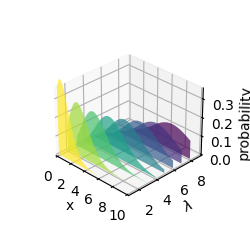

In [17]:
fig = plt.figure(figsize=(3.5,3))
ax = fig.add_subplot(projection='3d')


poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

ax.set_box_aspect(aspect=None, zoom=0.7)

# set view angle
ax.view_init(elev=30, azim=-45)

# plt.savefig('demo.png', dpi=300, bbox_inches='tight')

plt.show()
